# Data cleaning and preparation

Juan Pablo Echeagaray González

24/10/2021

## Basic libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

## Data reading

In [34]:
with ZipFile('data\\data.zip') as zip:
    with zip.open(zip.namelist()[0]) as data:
        df = pd.read_feather(data)

## Database variables

In [35]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'UCI'],
      dtype='object')

First variables to test:

1. Response variable: INTUBADO
2. Basic tags:
   1. SEXO
   2. EDAD
3. Respiratory illnesses:
   1. NEUMONIA
   2. EPOC
   3. TABAQUISMO
   4. ASMA
4. Overweight related:
   1. OBESIDAD
   2. DIABETES
   3. HIPERTENSION
   4. CARDIOVASCULAR
5. Extra conditions:
   1. EMBARAZO
   2. INMUSUPR
   3. RENAL_CRONICA

In [36]:
variables = ['INTUBADO', 'SEXO', 'EDAD', 'NEUMONIA', 'EPOC', 'TABAQUISMO', 'ASMA', 'OBESIDAD', 'DIABETES', 'HIPERTENSION', 'CARDIOVASCULAR',
            'EMBARAZO', 'INMUSUPR', 'RENAL_CRONICA']
df[variables].head()

,INTUBADO,SEXO,EDAD,NEUMONIA,EPOC,TABAQUISMO,ASMA,OBESIDAD,DIABETES,HIPERTENSION,CARDIOVASCULAR,EMBARAZO,INMUSUPR,RENAL_CRONICA
0,97,2,41,2,2,2,2,2,2,2,2,97,2,2
1,1,1,66,1,2,2,2,1,1,1,2,2,2,2
2,97,2,29,2,2,2,2,98,2,2,2,97,2,2
3,97,1,40,2,2,2,2,2,2,2,2,98,2,2
4,97,2,34,2,1,2,1,2,2,2,2,97,2,2


In [37]:
for variable in variables:
    print(f'''-------------- \n{df[variable].value_counts()}''')

-------------- 
97    10195291
2       895840
1       103601
99       13209
Name: INTUBADO, dtype: int64
-------------- 
1    5879344
2    5328597
Name: SEXO, dtype: int64
-------------- 
27     294318
28     293574
29     289453
26     287918
30     283160
        ...  
118        27
117        25
147         2
148         1
251         1
Name: EDAD, Length: 125, dtype: int64
-------------- 
2     10499024
1       662380
99       46537
Name: NEUMONIA, dtype: int64
-------------- 
2     11096681
1        83865
98       27395
Name: EPOC, dtype: int64
-------------- 
2     10380762
1       798848
98       28331
Name: TABAQUISMO, dtype: int64
-------------- 
2     10943720
1       237147
98       27074
Name: ASMA, dtype: int64
-------------- 
2     10074077
1      1107275
98       26589
Name: OBESIDAD, dtype: int64
-------------- 
2     10224285
1       954359
98       29297
Name: DIABETES, dtype: int64
-------------- 
2     9889235
1     1291107
98      27599
Name: HIPERTENSION, dtype: i

## Data cleaning

With this line we make sure that every male citizen that had an NA on the database for the variable pregnant, is now considered as non-pregnant. Simply dropping all those values would reduce in half our database

In [38]:
df.loc[(df.SEXO == 2) & (df.EMBARAZO == 97), 'EMBARAZO'] = 2

In [39]:
"""
I will not execute the following code until I get a response from the government, this might change completely how the
model will behave.
"""
# df.loc[df.INTUBADO == 97, 'INTUBADO'] = 2

'\nI will not execute the following code until I get a response from the government, this might change completely how the\nmodel will behave.\n'

### Basic visualizations

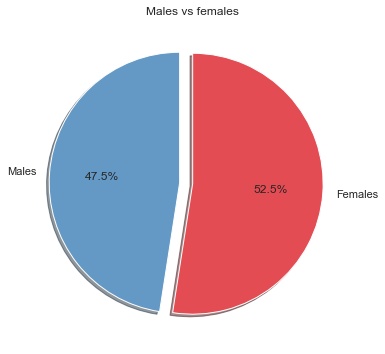

In [40]:
sns.set_theme(style='darkgrid')
labels = 'Males', 'Females'
sizes = [df.loc[df['SEXO'] == 2].shape[0], df.loc[df['SEXO'] == 1].shape[0]]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors = ['#6499c6', '#e44c54'])
plt.title("Males vs females")
plt.show()

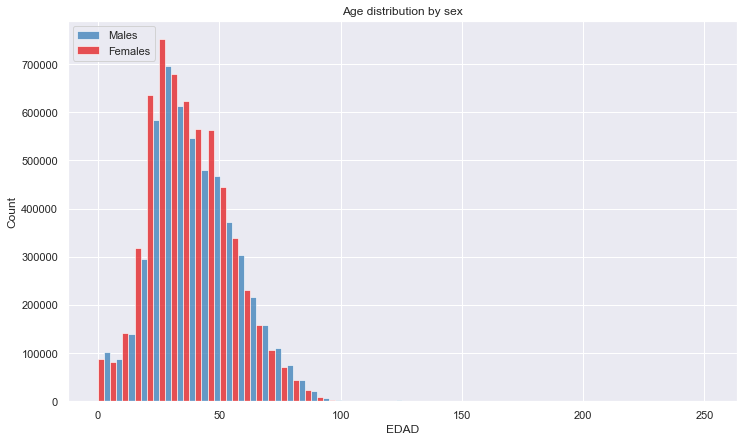

In [41]:
max_age = df['EDAD'].max()
block = 5
paleta_genero = sns.color_palette("Set1", 2)
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.histplot(df, x = df['EDAD'], bins = max_age // block, hue = df['SEXO'], multiple = 'dodge', legend=False, palette = paleta_genero)
plt.title('Age distribution by sex')
labels = ['Males', 'Females']
plt.legend(labels, loc='upper left')

### "NA" removal

Seaborn does not naturally generate histograms with wrong limits, so we have a lot of outlier values that we must either delete or conglomerate into a single value. I think I will set all ages above 100 to 101.

In [42]:
df['EDAD'].max()
df['EDAD'] = np.where(df['EDAD'] > 100, 100, df['EDAD'])

Now we repeat the same process, and we get a much nicer curve

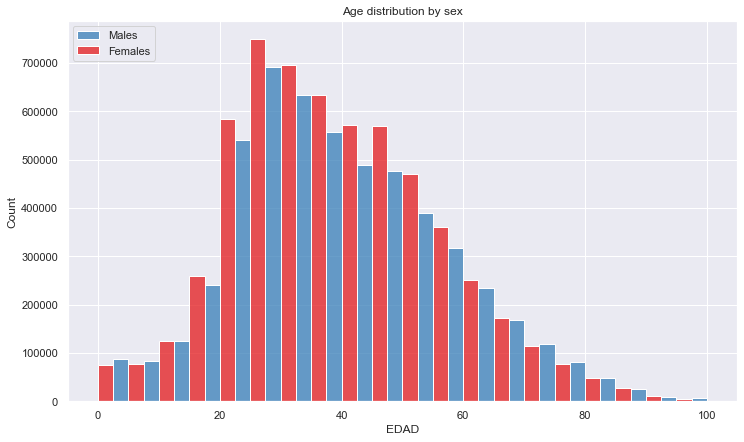

In [43]:
max_age = df['EDAD'].max()
block = 5
paleta_genero = sns.color_palette("Set1", 2)
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.histplot(df, x = df['EDAD'], bins = max_age // block, hue = df['SEXO'], multiple = 'dodge', legend=False, palette = paleta_genero)
plt.title('Age distribution by sex')
labels = ['Males', 'Females']
plt.legend(labels, loc='upper left')

Now we must clean all the other variables, lucky for us, they are all of the same type in the dictionary given. So the same rule will apply to all of them

In [44]:
cat_si_no = [97, 98, 99]
variables.remove('EDAD')
for variable in variables:
    df.drop(df[df[variable].isin(cat_si_no)].index, inplace=True)

Let's see how much we reduced our database (and how long it took)

In [45]:
original_size = 11_207_941
new_size = df.shape[0]
print(f'''
Original size = {original_size}
New size = {new_size}
Proportion = {new_size / original_size * 100:.3f}%''')
# We did not lose that much


Original size = 11207941
New size = 989740
Proportion = 8.831%


We have a very small data base of aproximately 9% of the original database size! Can we call it a sample? I don't think so

Let's check again if our data is clean again

In [46]:
variables.append('EDAD')
for variable in variables:
    print(f'''-------------- \n{df[variable].value_counts()}''')

-------------- 
2    887712
1    102028
Name: INTUBADO, dtype: int64
-------------- 
2    558887
1    430853
Name: SEXO, dtype: int64
-------------- 
1    539942
2    449798
Name: NEUMONIA, dtype: int64
-------------- 
2    953304
1     36436
Name: EPOC, dtype: int64
-------------- 
2    916441
1     73299
Name: TABAQUISMO, dtype: int64
-------------- 
2    969159
1     20581
Name: ASMA, dtype: int64
-------------- 
2    818221
1    171519
Name: OBESIDAD, dtype: int64
-------------- 
2    703067
1    286673
Name: DIABETES, dtype: int64
-------------- 
2    654588
1    335152
Name: HIPERTENSION, dtype: int64
-------------- 
2    942275
1     47465
Name: CARDIOVASCULAR, dtype: int64
-------------- 
2    975829
1     13911
Name: EMBARAZO, dtype: int64
-------------- 
2    962903
1     26837
Name: INMUSUPR, dtype: int64
-------------- 
2    927506
1     62234
Name: RENAL_CRONICA, dtype: int64
-------------- 
60     20731
61     20707
59     20398
63     20272
65     20225
       ...  
96  

Let´s now reduce the range of 'EDAD' to [0, 1]

In [47]:
column = 'EDAD'
df['EDAD'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
df['EDAD'].value_counts()

0.60    20731
0.61    20707
0.59    20398
0.63    20272
0.65    20225
        ...  
0.96      670
0.97      443
1.00      433
0.98      365
0.99      237
Name: EDAD, Length: 101, dtype: int64

Now I will change the encoding of all the variables (except for 'EDAD') from 1 for positive and 2 for negative, to 1 for positive and 0 for negative. In the case of 'SEXO', 1 will represent females and 0 males

In [48]:
df2 = df
variables.remove('EDAD')
for variable in variables:
    df2[variable] = df2[variable].replace(to_replace=[1, 2], value=[1, 0])

In [49]:
variables.append('EDAD')
for variable in variables:
    print(f'''-------------- \n{df2[variable].value_counts()}''')

-------------- 
0    887712
1    102028
Name: INTUBADO, dtype: int64
-------------- 
0    558887
1    430853
Name: SEXO, dtype: int64
-------------- 
1    539942
0    449798
Name: NEUMONIA, dtype: int64
-------------- 
0    953304
1     36436
Name: EPOC, dtype: int64
-------------- 
0    916441
1     73299
Name: TABAQUISMO, dtype: int64
-------------- 
0    969159
1     20581
Name: ASMA, dtype: int64
-------------- 
0    818221
1    171519
Name: OBESIDAD, dtype: int64
-------------- 
0    703067
1    286673
Name: DIABETES, dtype: int64
-------------- 
0    654588
1    335152
Name: HIPERTENSION, dtype: int64
-------------- 
0    942275
1     47465
Name: CARDIOVASCULAR, dtype: int64
-------------- 
0    975829
1     13911
Name: EMBARAZO, dtype: int64
-------------- 
0    962903
1     26837
Name: INMUSUPR, dtype: int64
-------------- 
0    927506
1     62234
Name: RENAL_CRONICA, dtype: int64
-------------- 
0.60    20731
0.61    20707
0.59    20398
0.63    20272
0.65    20225
        ... 

Now let's save this dataframe to a new file

## Storing the cleaned data

In [50]:
df = df2
df.to_pickle('data\\clean_data.pkl')